In [1]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

train = pd.read_csv('~/Downloads/prepared_train_data sd.csv')
test = pd.read_csv('~/Downloads/prepared_test_data sd.csv')
train.head()


,num__avtisst,num__dnrday,cat_simple__dnr,num__adlsc,num__prg6m,num__adls,cat_one_hot__dzgroup_COPD,num__sps,num__aps,num__hday,cat_one_hot__dzclass_ARF/MOSF,cat_simple__sfdm2
0,2.486522,-0.359283,-0.758602,-0.902677,-1.560443,-0.762361,-0.345108,1.313336,1.388011,-0.062275,1.047867,1.0
1,1.673238,-0.463264,-0.758602,0.068511,0.044698,0.264000,-0.345108,1.146439,2.124315,1.822473,1.047867,1.0
2,1.895043,-0.619234,1.067256,-0.417083,-1.382094,-0.249181,-0.345108,0.970354,0.602621,-0.271691,1.047867,1.0
3,-0.840547,-0.359283,-0.758602,0.554105,-0.668698,0.777181,-0.345108,0.146967,1.142577,-0.166983,1.047867,1.0
4,-0.692677,-0.671224,1.067256,0.445510,0.044698,-0.249181,-0.345108,-0.000026,-0.673639,-0.376399,-0.954319,1.0


In [2]:
X_train = train.drop(columns=["cat_simple__sfdm2"])
y_train = train["cat_simple__sfdm2"]

X_test = test.drop(columns=["cat_simple__sfdm2"])
y_test = test["cat_simple__sfdm2"]

X_test_encoded = pd.get_dummies(X_test, drop_first=True)
X_train, X_test_encoded = X_train.align(X_test_encoded, join="left", axis=1, fill_value=0)


Before oversampling: Counter({1.0: 2498, 2.0: 2449, 3.0: 733, 4.0: 451, 5.0: 33})


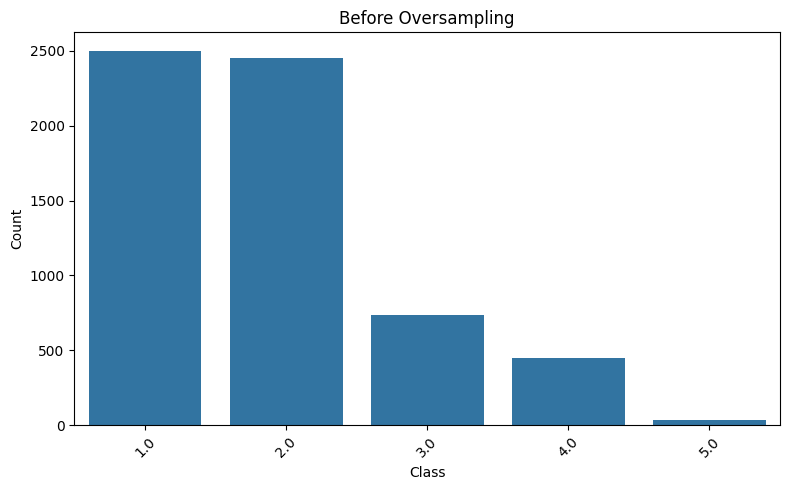

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

def plot_class_distribution(y, title="Class Distribution"):
    class_counts = Counter(y)
    classes = list(class_counts.keys())
    counts = list(class_counts.values())

    plt.figure(figsize=(8, 5))
    sns.barplot(x=classes, y=counts)
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
# Before
print("Before oversampling:", Counter(y_train))
plot_class_distribution(y_train, "Before Oversampling")

In [9]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test_encoded)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.75      0.82      0.78       625
           2       0.68      0.83      0.75       612
           3       0.51      0.31      0.38       183
           4       0.29      0.02      0.03       113
           5       0.00      0.00      0.00         8

    accuracy                           0.70      1541
   macro avg       0.45      0.39      0.39      1541
weighted avg       0.66      0.70      0.66      1541



/opt/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


After oversampling: Counter({1.0: 2498, 2.0: 2498, 4.0: 2498, 3.0: 2498, 5.0: 2498})


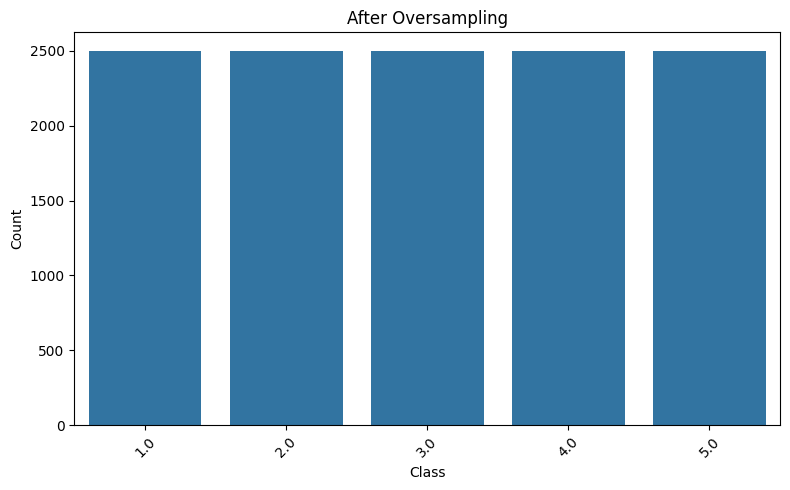

In [106]:
#Random oversampling method
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

X_ros_df = pd.DataFrame(X_train_ros, columns=X_train.columns)
y_ros_df = pd.Series(y_train_ros, name='target')

# Plot class distribution after oversampling
print("After oversampling:", Counter(y_train_ros))
plot_class_distribution(y_train_ros, "After Oversampling")

# Combine features and target
ros_combined_df = pd.concat([X_ros_df, y_ros_df], axis=1)

# Export to CSV
ros_combined_df.to_csv('training_data_ros.csv', index=False)

In [10]:
# random oversampling result
clf_ros = RandomForestClassifier(random_state=42)
clf_ros.fit(X_train_ros, y_train_ros)


y_pred_ros = clf_ros.predict(X_test)


print(" Classification Report (After Random Oversampling):")
print(classification_report(y_test, y_pred_ros))

 Classification Report (After Random Oversampling):
              precision    recall  f1-score   support

           1       0.78      0.80      0.79       625
           2       0.69      0.82      0.75       612
           3       0.45      0.37      0.40       183
           4       0.11      0.03      0.04       113
           5       0.00      0.00      0.00         8

    accuracy                           0.69      1541
   macro avg       0.41      0.40      0.40      1541
weighted avg       0.65      0.69      0.67      1541



In [105]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Using SMOTE to generate synthetic observations for minority class
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


clf_smote = RandomForestClassifier(random_state=42)
clf_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = clf_smote.predict(X_test)

X_smote_df = pd.DataFrame(X_train_smote, columns=X_train.columns)
y_smote_df = pd.Series(y_train_smote, name='target')

print(" Classification Report (SMOTE):")
print(classification_report(y_test, y_pred_smote))
# Combine features and target
smote_combined_df = pd.concat([X_smote_df, y_smote_df], axis=1)

# Export to CSV
smote_combined_df.to_csv('training_data_smote.csv', index=False)

 Classification Report (SMOTE):
              precision    recall  f1-score   support

           1       0.79      0.77      0.78       625
           2       0.70      0.75      0.73       612
           3       0.39      0.38      0.38       183
           4       0.12      0.08      0.10       113
           5       0.11      0.12      0.12         8

    accuracy                           0.67      1541
   macro avg       0.42      0.42      0.42      1541
weighted avg       0.65      0.67      0.66      1541



In [19]:
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
import numpy as np


# Perform under/oversampling to reach specified sample count per class
def flexible_balance_data(X, y, target_counts, pca_variance_ratio=0.9, lam_range=(0, 1), random_state=42):
    np.random.seed(random_state)
    X = np.asarray(X)
    y = np.asarray(y)
    class_counts = Counter(y)

    # Downsample classes with more samples than target
    undersample_dict = {
        cls: target_counts[cls] for cls in class_counts
        if cls in target_counts and class_counts[cls] > target_counts[cls]
    }

    rus = RandomUnderSampler(sampling_strategy=undersample_dict, random_state=random_state)
    X_rus, y_rus = rus.fit_resample(X, y)

    post_counts = Counter(y_rus)
    X_aug = X_rus.copy()
    y_aug = y_rus.copy()

    # Generate synthetic samples for underrepresented classes
    for cls, count in post_counts.items():
        if cls not in target_counts:
            continue

        target_count = target_counts[cls]
        if count >= target_count:
            continue

        X_cls = X_rus[y_rus == cls]
        n_to_generate = target_count - count
        k = min(5, len(X_cls) - 1)

        pca = PCA(n_components=pca_variance_ratio, random_state=random_state)
        X_cls_pca = pca.fit_transform(X_cls)
        nn = NearestNeighbors(n_neighbors=k + 1)
        nn.fit(X_cls_pca)
        neighbors = nn.kneighbors(X_cls_pca, return_distance=False)

        synthetic_samples = []
        for _ in range(n_to_generate):
            idx = np.random.randint(0, len(X_cls))
            neighbor_idx = np.random.choice(neighbors[idx][1:])
            lam = np.random.uniform(*lam_range)
            new_sample = X_cls[idx] + lam * (X_cls[neighbor_idx] - X_cls[idx])
            synthetic_samples.append(new_sample)

        X_aug = np.vstack([X_aug, synthetic_samples])
        y_aug = np.concatenate([y_aug, np.full(n_to_generate, cls)])

    return X_aug, y_aug

# Main pipeline to balance, train, and evaluate


In [ ]:
def augsmote_pipeline(X_train, y_train, X_test, y_test, target_counts):

    # Apply augmented SMOTE using custom flexible balancing
    X_aug, y_aug = flexible_balance_data(
        X_train, y_train,
        target_counts=target_counts,
        pca_variance_ratio=0.9,
        lam_range=(0.1, 0.9),
        random_state=42
    )

    # Train classifier
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_aug, y_aug)

    # Predict and evaluate
    y_pred = clf.predict(X_test)
    print("\nClassification Report (augSMOTE):")
    print(classification_report(y_test, y_pred))

    return clf, X_aug, y_aug

In [103]:
clf, X_aug, y_aug = augsmote_pipeline(
    X_train, y_train, X_test, y_test,
    target_counts={1: 700, 2: 700, 3: 350, 4: 280, 5: 80}
)


Classification Report (augSMOTE):
              precision    recall  f1-score   support

           1       0.78      0.78      0.78       625
           2       0.70      0.79      0.74       612
           3       0.46      0.40      0.43       183
           4       0.17      0.08      0.11       113
           5       0.25      0.12      0.17         8

    accuracy                           0.69      1541
   macro avg       0.47      0.44      0.44      1541
weighted avg       0.66      0.69      0.67      1541



/opt/miniconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [104]:
import pandas as pd

X_aug_df = pd.DataFrame(X_aug, columns=X_train.columns)
y_aug_df = pd.Series(y_aug, name='target')

final_augmented_data = pd.concat([X_aug_df, y_aug_df], axis=1)
final_augmented_data.to_csv("augmented_scaled_data.csv", index=False)